In [3]:
import Permutations as pm
import sympy
from numpy.random import randint as ri
from ToolsForQuasiCord import *

sympy.init_printing()

import itertools

import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
from tqdm.notebook import tqdm

## Setting $T>L>R$. On each $T-L$ and $R$, changing $B$ and $L$ one by one

In [103]:
def map_maker_fix_e(e, size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=["R={}".format(v) for v in range(1, Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        r = 1 + i * Col + j
        df = pd.read_csv(f"data/fix_T-L_R/T-L={e}_R={r}_100x100.csv")
        mat = df.values[:size, :size]
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    # ---
    fig.update_layout(
        height=320 * Row, width=250 * Col, title="T>L>R, T-L={}".format(e)
    )
    return fig

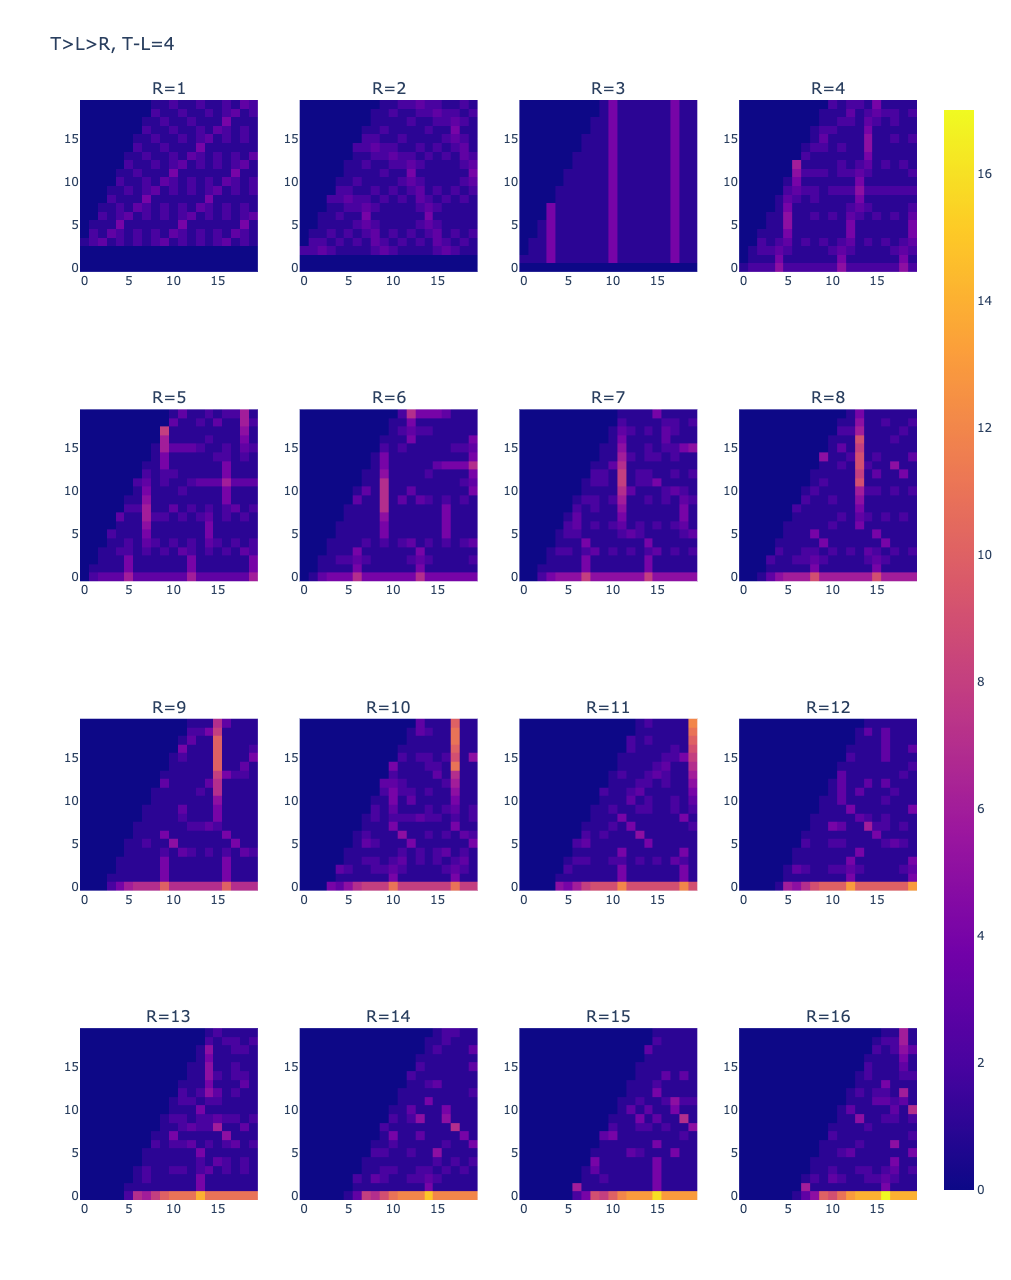

In [104]:
map_maker_fix_e(4).show()

## $T-L=R+1$ series

$[L+R+1,L,B,R],~ (1 \leq R \leq L)$

__予想:__  
* $|L+R+1,L,B,R|=|L+R+1,L,1,R|$
* $L_{n} = (R+1)+(2R+1)n$ として、$|L_{n}+R+1,L_{n},1,R|=R+1,~~ \forall n \in \mathbb{N}$ 

In [ ]:
def map_maker_01(delta=1, size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=["R={}".format(v) for v in range(1, Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        r = 1 + i * Col + j
        df = pd.read_csv(f"data/T-L={delta}_R={r}_100x100.csv")
        mat = df.values[:size, :size]
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    # ---
    fig.update_layout(
        height=380 * Row, width=300 * Col, title="T>L>R, T-L={}".format(delta)
    )
    return fig

In [ ]:
size = 30
Row, Col = 5, 3
fig = make_subplots(
    Row, Col, subplot_titles=["R={}".format(v) for v in range(1, Row * Col + 1)]
)
# ---
for i, j in tqdm(itertools.product(range(Row), range(Col)), total=Row * Col):
    r = 1 + i * Col + j
    d = r + 1
    try:
        df = pd.read_csv(f"data/fix_T-L_R/T-L={d}_R={r}_100x100.csv")
        mat = df.values[:size, :size]
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    except:
        pass
# ---
fig.update_layout(height=320 * Row, width=240 * Col, title="T>L>R, T-L=R+1")
fig.show()

In [ ]:
N = 16
size = 50
# ---
mat = []
ylabel = []
for r in range(N + 1):
    try:
        df = pd.read_csv(f"data/fix_T-L_R/T-L={r+1}_R={r}_100x100.csv")
        b = 1
        mat += [df.values[b, :size]]
        ylabel += [f"R={r}"]
    except:
        pass
# ---
display(sympy.Matrix(mat))
fig = px.imshow(mat, y=ylabel, aspect="equal")
# ---
fig.update_layout(
    height=24 * len(ylabel), width=960, title=f"T>L>R, |L+R+1, L, {b}, R|"
)
fig.show()

In [ ]:
for r in range(1, 17):
    seq = []
    try:
        for n in range(50):
            seq += [mat[r - 1][((r + 1) + (2 * r + 1) * n) - 1]]
    except:
        pass
    print(seq)

In [ ]:
mtx = []
for r in range(1, 17):
    seq = []
    try:
        for n in range(50):
            seq += [mat[r - 1][((1 + 1) + (2 * 1 + 1) * n) - 1]]
    except:
        pass
    mtx += [seq]
display(sympy.Matrix(mtx))
px.imshow(mtx)

## $T-L=R+e$ series

  0%|          | 0/16 [00:00<?, ?it/s]

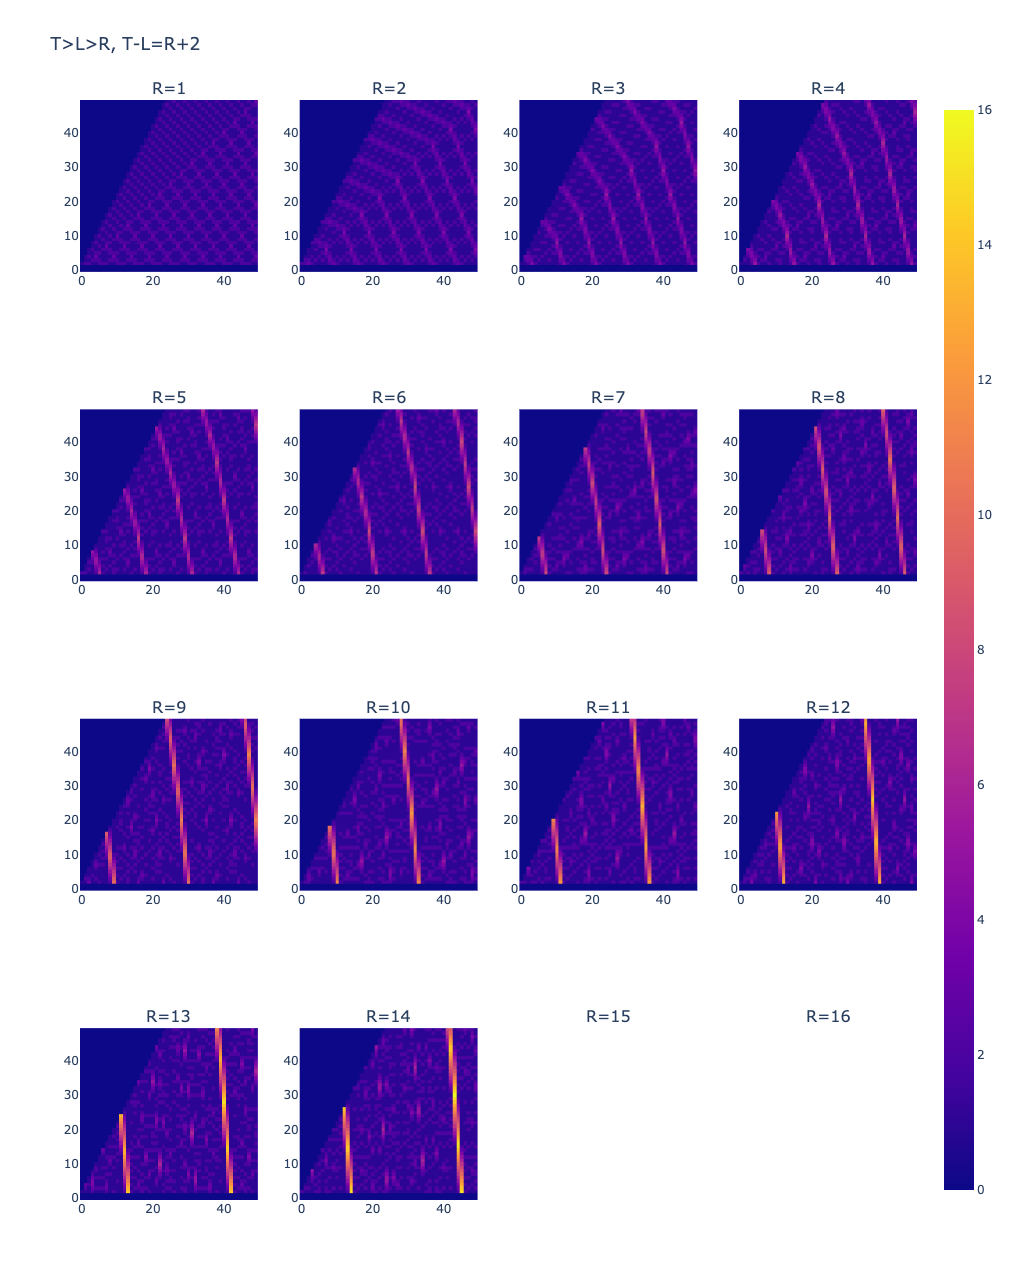

In [102]:
e = 2
size = 50
Row, Col = 4, 4
fig = make_subplots(
    Row, Col, subplot_titles=["R={}".format(v) for v in range(1, Row * Col + 1)]
)
# ---
for i, j in tqdm(itertools.product(range(Row), range(Col)), total=Row * Col):
    r = 1 + i * Col + j
    d = r + e
    try:
        df = pd.read_csv(f"data/fix_T-L_R/T-L={d}_R={r}_100x100.csv")
        mat = df.values[:size, :size]
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    except:
        pass
# ---
fig.update_layout(height=320 * Row, width=240 * Col, title=f"T>L>R, T-L=R+{e}")
fig.show()

## $T=L+e$ series

$[L+e,L,B,R],~~(L \geq B+R)$

__予想01:__ 
* $|L,L,B,R| = |L+1,L,B,R| = |B+R,B+R,B,R|,~ (L \geq B + R)$

  0%|          | 0/16 [00:00<?, ?it/s]

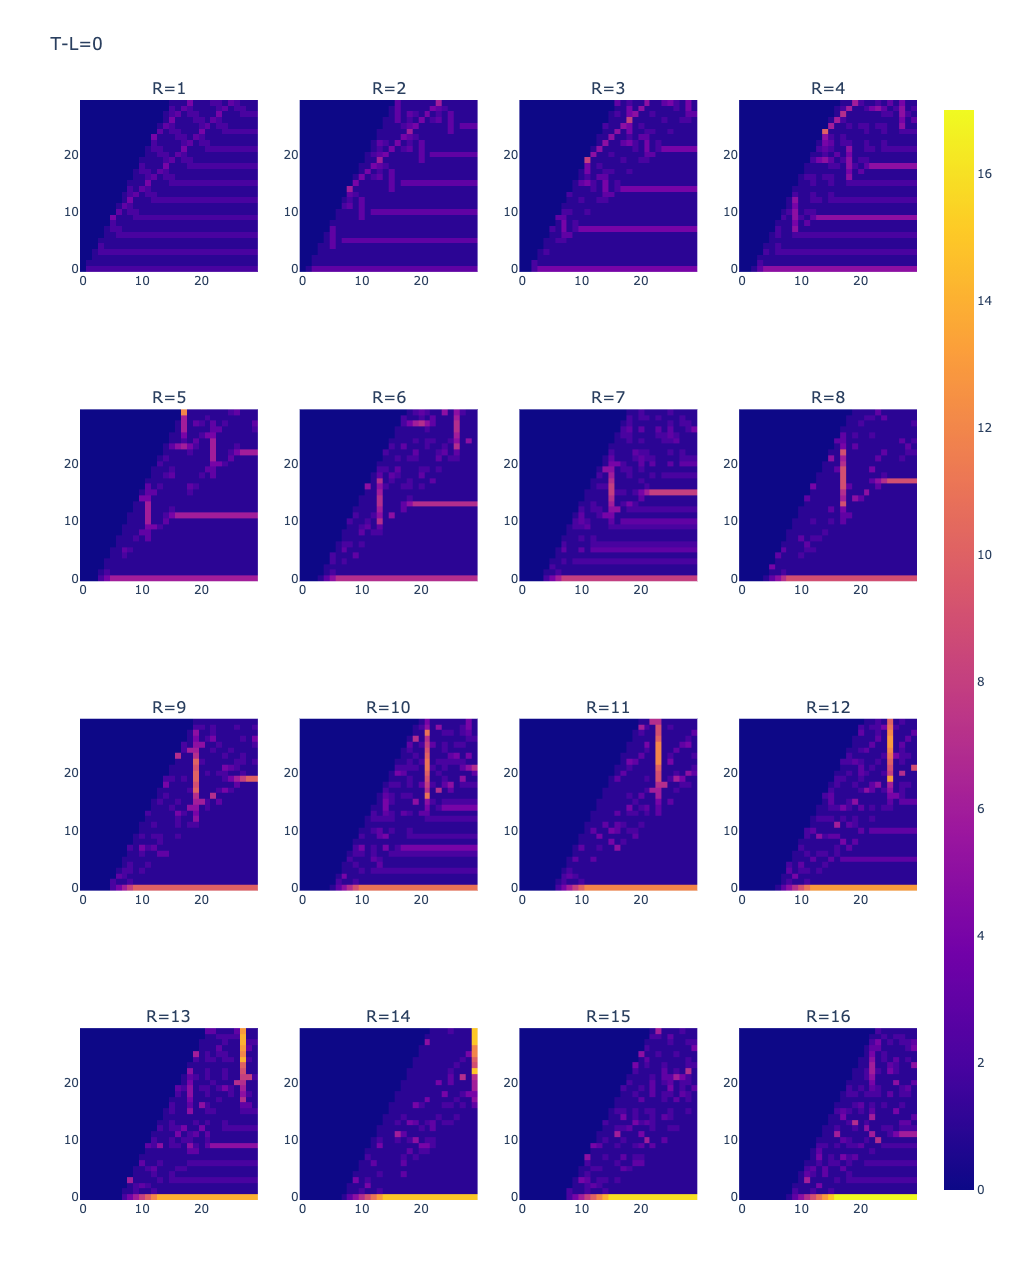

In [105]:
e = 0
size = 30
Row, Col = 4, 4
fig = make_subplots(
    Row, Col, subplot_titles=["R={}".format(v) for v in range(1, Row * Col + 1)]
)
# ---
for i, j in tqdm(itertools.product(range(Row), range(Col)), total=Row * Col):
    r = 1 + i * Col + j
    mat = []
    try:
        df = pd.read_csv(f"data/fix_T-L_R/T-L={e}_R={r}_100x100.csv")
        for b in range(size):
            s = 0  # b+r  #int((b+r)/2) + ((b+r)%2)  #
            try:
                mat += [df.values[b, s : size + s]]
            except:
                pass
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    except:
        pass
# ---
fig.update_layout(height=320 * Row, width=240 * Col, title=f"T-L={e}")
fig.show()

## $[B+R,B+R,B,R]$

__予想02:__
* $|B+R,B+R,B,R| = |B+2R+1,B+R,1,R|$

In [ ]:
e = 0
N = 16
size = 50
# ---
mat, ylabel = [], []
for r in range(1, N + 1):
    try:
        df = pd.read_csv(f"data/fix_T-L_R/T-L={e}_R={r}_100x100.csv")
        # ---
        mat += [[df.values[b, b + r] for b in range(size)]]
        ylabel += [f"R={r}"]
    except:
        pass
# ---
fig = px.imshow(mat, y=ylabel, aspect="equal")
fig.update_layout(height=24 * len(ylabel), width=960, title=f"|B+R+{e},B+R,B,R|")
fig.show()

## Fixing $B$ and $R$, changing $T$ and $L$ one by one

### fix B

In [67]:
def map_maker_fix_b(b, size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=[f"R={v}" for v in range(Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        r = i * Col + j
        try:
            df = pd.read_csv(f"data/fix_BR/B={b}_R={r}_100x100.csv")
            mat = df.values[:size, :size]
            fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
        except:
            pass
    # ---
    fig.update_layout(height=320 * Row, width=250 * Col, title=f"B={b}")
    return fig

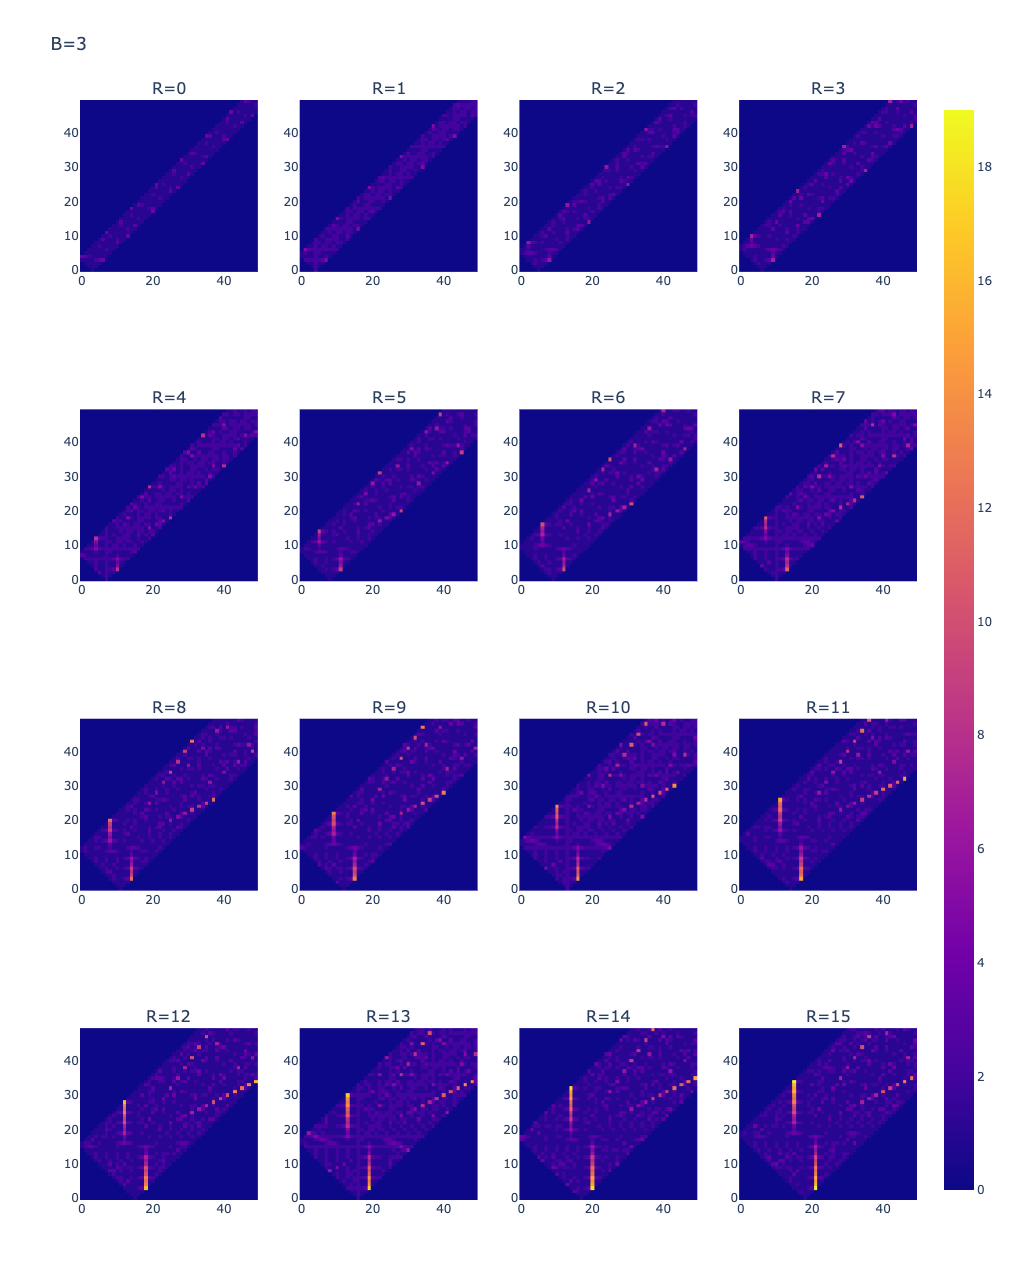

In [106]:
map_maker_fix_b(3, 50, 4, 4).show()

### fix R

In [70]:
def map_maker_fix_r(r, size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=[f"B={v}" for v in range(Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        b = i * Col + j
        try:
            df = pd.read_csv(f"data/fix_BR/B={b}_R={r}_100x100.csv")
            mat = df.values[:size, :size]
            fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
        except:
            pass
    # ---
    fig.update_layout(height=320 * Row, width=250 * Col, title=f"R={r}")
    return fig

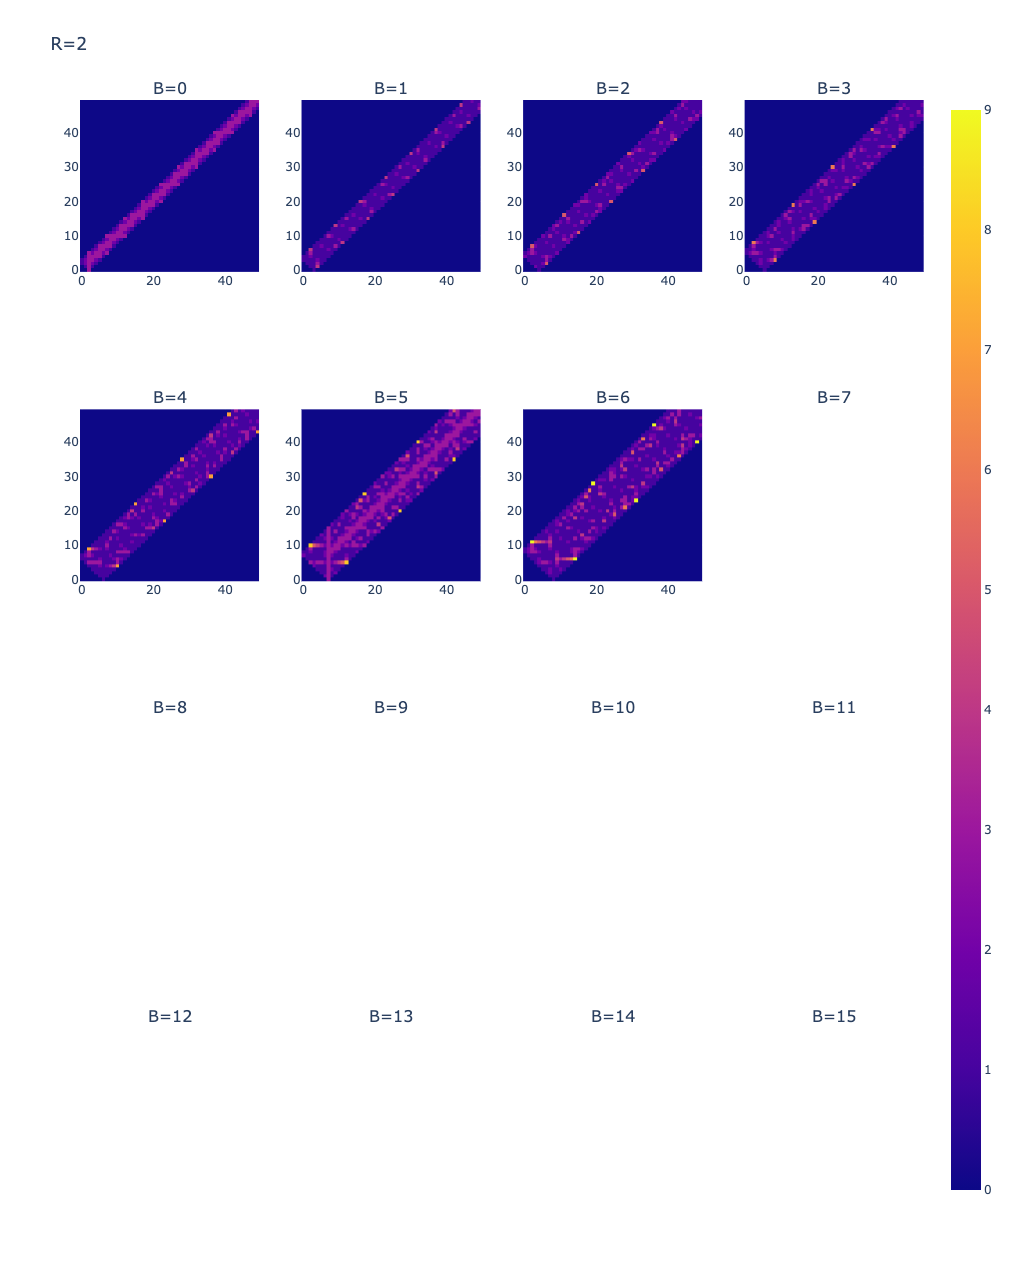

In [113]:
map_maker_fix_r(2, 50).show()

### fix B-R

In [92]:
def map_maker_fix_diff(d, size=20, Row=4, Col=4):
    shift = max(0, d)
    fig = make_subplots(
        Row,
        Col,
        subplot_titles=[f"B={v},R={v-d}" for v in range(shift, Row * Col + 1 + shift)],
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        b = i * Col + j + shift
        try:
            df = pd.read_csv(f"data/fix_BR/B={b}_R={b-d}_100x100.csv")
            mat = df.values[:size, :size]
            fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
        except:
            pass
    # ---
    fig.update_layout(height=320 * Row, width=250 * Col, title=f"B-R={d}")
    return fig

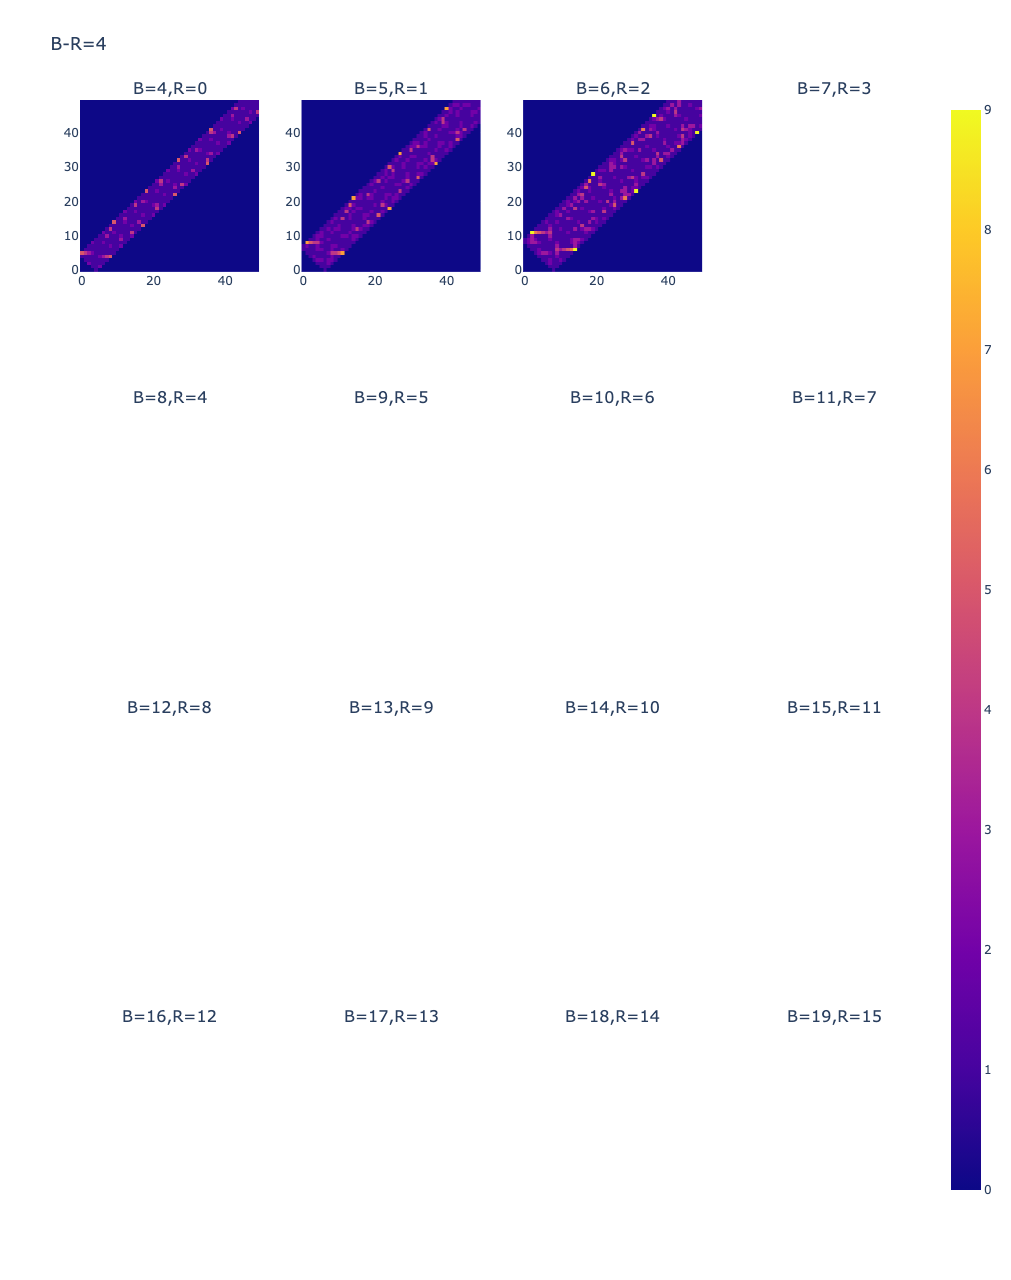

In [112]:
map_maker_fix_diff(4, 50).show()